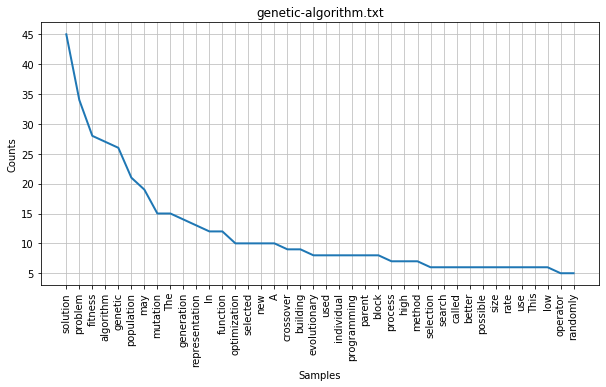

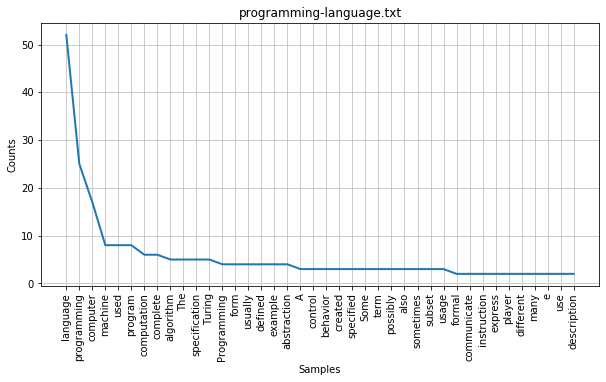

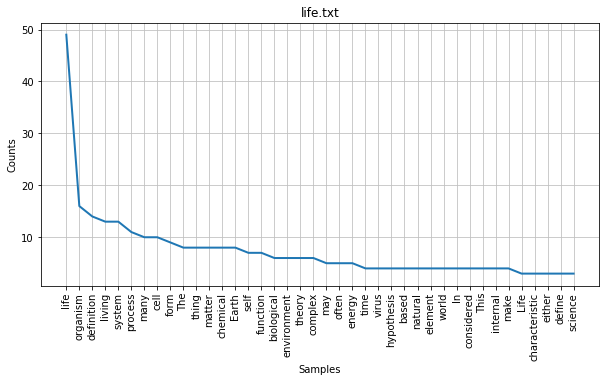

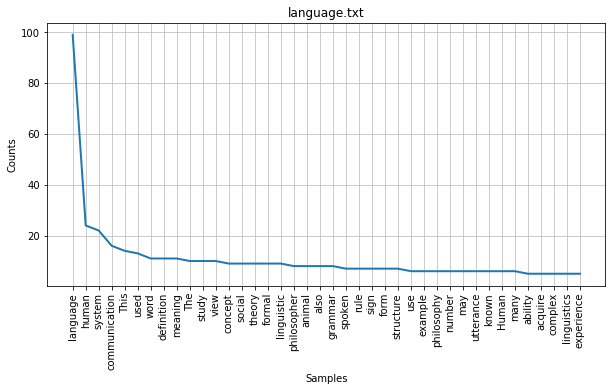

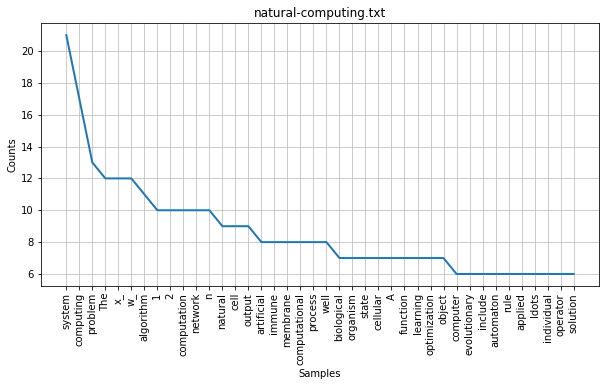

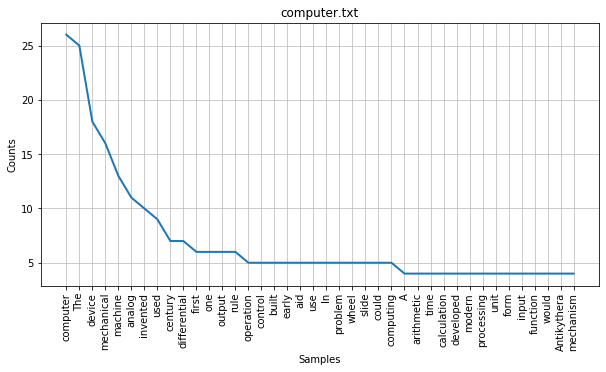

In [35]:
#!/bin/env python
# 2020/01/21
# Text analysis, tokenization, stop words, lemmatizing and cosine similarity
# Stanislaw Grams <sjg@fmdx.pl>
# 08-text_mining/01-text_analysis.ipynb
import sys, os
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

ARTICLES_DIR = "./articles/"
ALL_FILES = ["genetic-algorithm.txt",
             "programming-language.txt",
             "life.txt",
             "language.txt",
             "natural-computing.txt",
             "computer.txt"
            ]
tokenizer  = RegexpTokenizer (r'\w+')
stop_words = set (stopwords.words ("english"))
lem        = WordNetLemmatizer ()

texts = list ()
for filename in ALL_FILES:
    file = open (ARTICLES_DIR+filename, "r").read ()
    
    ## tokenization (only words)
    tokenized_word = tokenizer.tokenize (file)
    
    ## filtering for stopwords
    filtered_word = []
    for w in tokenized_word:
        if w not in stop_words:
            filtered_word.append (w)
    
    ## lemmatization
    lemmatized_word = []
    for w in filtered_word:
        lemmatized_word.append (lem.lemmatize (w))
    
    ## add to final list
    texts.append (lemmatized_word)
    
    ## plotting FreqDist
    plt.figure(figsize = (10, 5))
    plt.gcf ().subplots_adjust (bottom=0.15) # to avoid x-ticks cut-off
    fdist = FreqDist (lemmatized_word)
    fdist.plot (40, title=filename, cumulative=0)

In [36]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [open(ARTICLES_DIR+filename, "r").read () for filename in ALL_FILES]
tfidf = TfidfVectorizer().fit_transform(documents)

pairwise_similarity = tfidf * tfidf.T
print (pairwise_similarity.toarray ())

[[1.         0.44239735 0.62633901 0.58734077 0.72074138 0.61354657]
 [0.44239735 1.         0.41026341 0.63434843 0.43519096 0.4255163 ]
 [0.62633901 0.41026341 1.         0.60553115 0.65151052 0.58900489]
 [0.58734077 0.63434843 0.60553115 1.         0.60251777 0.59641304]
 [0.72074138 0.43519096 0.65151052 0.60251777 1.         0.63106544]
 [0.61354657 0.4255163  0.58900489 0.59641304 0.63106544 1.        ]]
